Data Analysis
This notebook provides practical examples related to Lecture 002 of the Supervised Learning course from the AI Master's Degree. Some of the images and figures generated here will be used in the corresponding LaTeX document. Therefore, it is necessary to run this notebook before compiling the LaTeX document to ensure all required images are available.

## The Iris Dataset

The Iris dataset is a well-known dataset in machine learning and statistics. It contains **150 samples** of iris flowers, evenly distributed across three species:

- **Iris setosa**
- **Iris versicolor**
- **Iris virginica**

Each sample includes **four features**, all measured in centimeters:

- **Sepal length**: Length of the outer sepal (green leaf-like structure)
- **Sepal width**: Width of the outer sepal
- **Petal length**: Length of the inner petal (colored part of the flower)
- **Petal width**: Width of the inner petal

The **target variable** is the species of the iris flower, belonging to one of the three classes above. These classes are characterized as follows:

- *Iris setosa*: Typically smaller, with distinct sepal and petal sizes
- *Iris versicolor*: Intermediate in size and feature values
- *Iris virginica*: Usually the largest, with notable differences in sepal and petal measurements

The dataset was first introduced by Ronald Fisher in 1936 for discriminant analysis and remains a classic example for classification tasks.


In [51]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load the Iris dataset
iris = load_iris()

X = iris.data # This is a numpy array of shape (150, 4)
Y = iris.target # This is a numpy array of shape (150,)


Once imported, we can see the names of each data entry, as well as the target names. Let's take the first entry of `iris.data`

In [14]:
first_entry = iris.data[0]

print("First entry of the Iris dataset:")
for i in range(len(first_entry)):
    property_name = iris.feature_names[i]
    property_value = first_entry[i]
    print(f"{property_name}: {property_value}")

print(f"Target: {iris.target_names[iris.target[0]]}")




First entry of the Iris dataset:
sepal length (cm): 5.1
sepal width (cm): 3.5
petal length (cm): 1.4
petal width (cm): 0.2
Target: setosa


With this dataset, we'll cover the topics discussed in the Lecture - 002 (Data Analysis)

## Descriptive Data Analysis
###  Types of Variables
As we saw in the document, we could have quantitative and qualitative variables, each of them with its own types. Here we'll se some examples of each one

In [16]:
# Quantitative Variables

# Discrete: Although this dataset doesn't contain discrete values,
# we can consider the length of the dataset as a discrete variable

target_size = len(iris.target)
print(f"The dataset contains {target_size} samples. This is a discrete value")

# Continuous: The sepal length is a continuous variable, as it can take any value within a range.

first_entry_sepal_length = first_entry[0]
print(f"The first entry of the dataset has a sepal length of {first_entry_sepal_length} cm. This is a continuous value")


The dataset contains 150 samples. This is a discrete value
The first entry of the dataset has a sepal length of 5.1 cm. This is a continuous value


In [19]:
# Qualitative Variables

# Nominal: The species is a nominal variable, as it can take on different values (setosa, versicolor, virginica)

species = iris.target_names[iris.target[0]]
print(f"The first entry of the dataset belongs to the species {species}. This is a nominal value")

# Ordinal: This dataset doesn't contain ordinal variables, but an example could be the size of a t-shirt (S, M, L, XL)

t_shirt_size = "M"
print(f"My t-shirt size is {t_shirt_size}. This is an ordinal value")





The first entry of the dataset belongs to the species setosa. This is a nominal value
My t-shirt size is M. This is an ordinal value


### Characterization of Variable Distributions
#### Histogram
We can make an histogram with the information available in the dataset. For example, let's make an histogram of petal length

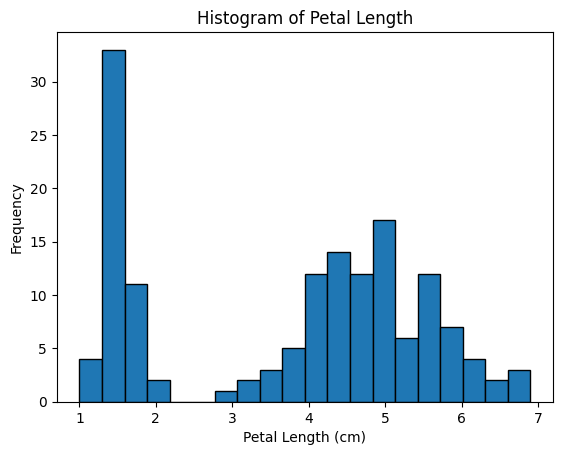

In [22]:
# Histogram of petal length

petal_length_values = iris.data[:, 2] # This will give us all the values of the petal length, taking the third column of the dataset
bins = 20 # This is the number of bins in the histogram (Number of bars)

plt.hist(petal_length_values, bins, edgecolor='black')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


We can appreciate that there's a lot of flowers with petal length between 1 and 2 (left peak), and there's a bell shape at the right indicating there's also values between 4 and 5 cm

## Exploratory Data Analysis
### Measures of Dispersion

#### Range
Range is the difference between upper and lower limits of a dataset. In this example, let's say the range of the petal length

In [24]:
# Range of petal length

max_petal_length = np.max(petal_length_values)
min_petal_length = np.min(petal_length_values)
range_petal_length = max_petal_length - min_petal_length

print(f"The range of the petal length is {range_petal_length} cm")



The range of the petal length is 5.9 cm


In [27]:
# Quartiles

q1, q2, q3 = np.percentile(petal_length_values, [25, 50, 75])

print(f"The first quartile of the petal length is {q1} cm") # Represents 25% of the data
print(f"The second quartile of the petal length is {q2} cm") # Corresponds to the median of the data
print(f"The third quartile of the petal length is {q3} cm") # Represents 75% of the data



The first quartile of the petal length is 1.6 cm
The second quartile of the petal length is 4.35 cm
The third quartile of the petal length is 5.1 cm


In [28]:
# As we remember, the interquartile range is the difference between the third and first quartile

interquartile_range = q3 - q1

print(f"The interquartile range of the petal length is {interquartile_range} cm")



The interquartile range of the petal length is 3.4999999999999996 cm


#### Variance 
The average of the squared deviations from the arithmetic mean. We could use the formula, but numpy has a builtin `.var` function that does that for us

In [29]:
# Variance of petal length

variance_petal_length = np.var(petal_length_values) # We could just use the np function instead of the formula

print(f"The variance of the petal length is {variance_petal_length} cm^2")




The variance of the petal length is 3.0955026666666665 cm^2


#### Standard Deviation
To resolve the problem of squared units of measurement, the square root of the variance
is calculated, always taking the positive value.

In [30]:
# Standard deviation of petal length

standard_deviation_petal_length = np.std(petal_length_values) # Again, we could just use the np function instead of the formula

print(f"The standard deviation of the petal length is {standard_deviation_petal_length} cm") # Notice how we got cm instead of cm^2



The standard deviation of the petal length is 1.759404065775303 cm


### Outlier Detection
#### Box Plot
We'll use the petal example for box plot too

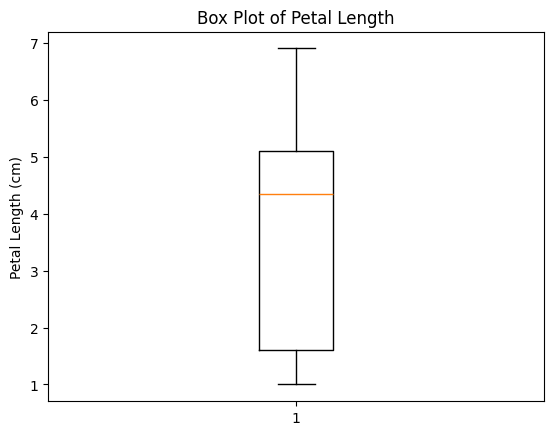

In [31]:
# Box plot of petal length

plt.boxplot(petal_length_values)
plt.title('Box Plot of Petal Length')
plt.ylabel('Petal Length (cm)')
plt.show()


### Scatter Plots
#### Two-dimensional Scatter Plots
hese graphs show
the relationship between numerical variables, and they allow discovering and confirming
anticipated relationships between two associated sets of data.

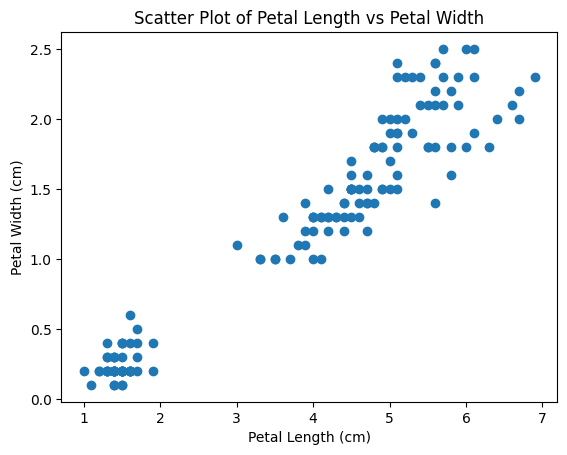

In [32]:
# Scatter plot of petal length vs petal width

petal_width_values = iris.data[:, 3] # This will give us all the values of the petal width, taking the fourth column of the dataset

plt.scatter(petal_length_values, petal_width_values)
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

We can see that there's a linear correlation between the petal width and the petal length

#### Scatter Plot Matrix
Presents multiple adjacent scatter
plots for all variable comparisons in a single display. 

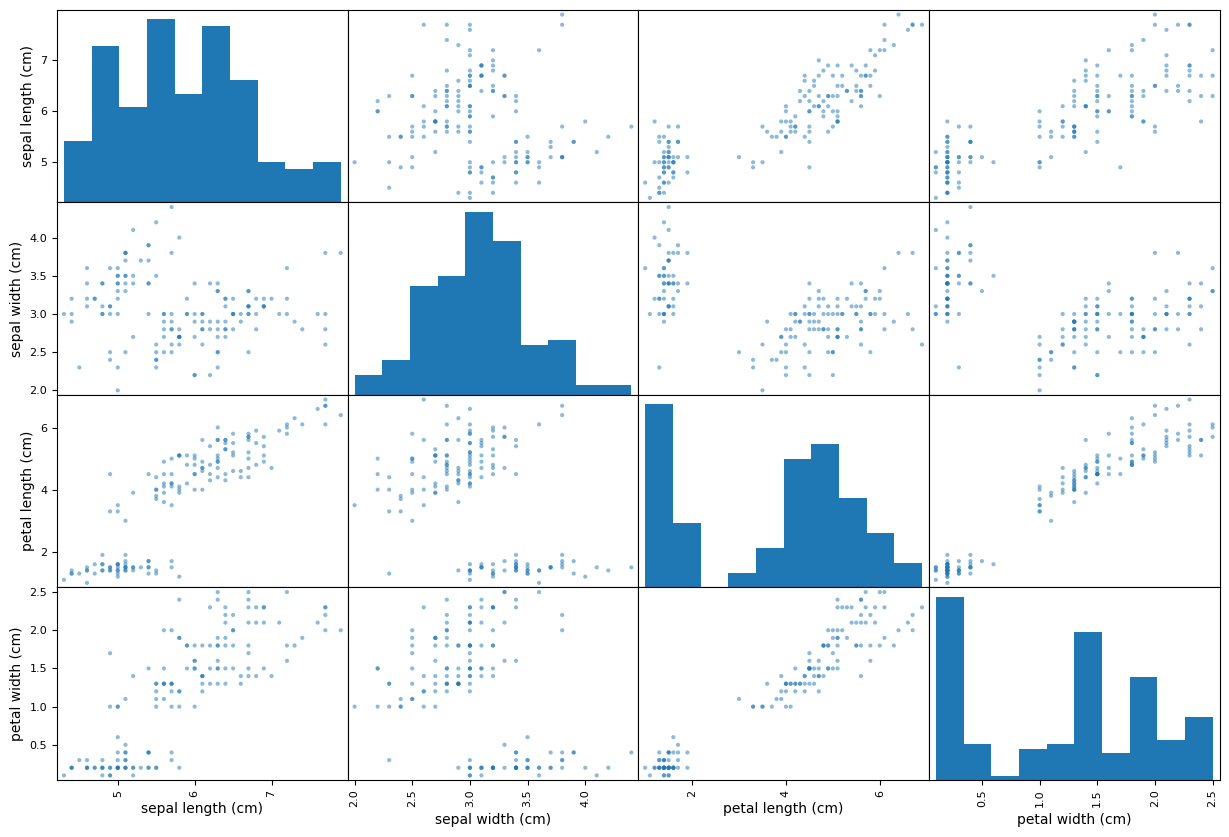

In [39]:
# Scatter plot matrix

scatter_matrix = pd.plotting.scatter_matrix(pd.DataFrame(iris.data, columns=iris.feature_names))
plt.gcf().set_size_inches(15, 10)  # 1080x720 pixels at 72 dpi
plt.show()


### Correlation between Variables
#### Linear Correlation
Quantifies the degree of joint variation
that exists between two variables and, specifically, evaluates the increasing or decreasing
trend of the data

In [45]:
# Linear correlation

petal_length_index = 2
petal_width_index = 3
correlation_petal_length_petal_width = correlation_matrix[petal_length_index, petal_width_index]
print(f"The linear correlation between the petal length and the petal width is {correlation_petal_length_petal_width}")



The linear correlation between the petal length and the petal width is 0.9628654314027962


In [49]:
# We can also use the pandas library to calculate the correlation matrix
# and print it in a more readable format
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
corr_matrix = iris_df.corr()
corr_matrix 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Covariance Matrix
Statistics allow understanding relationships between multiple variables simultaneously.
If covariance is positive, the linear association is positive. If covariance is negative, the
linear association is negative

In [50]:
# Covariance matrix
cov_matrix = iris_df.cov()
iris_df 






,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


We can also make a heatmap using the covariance matrix data

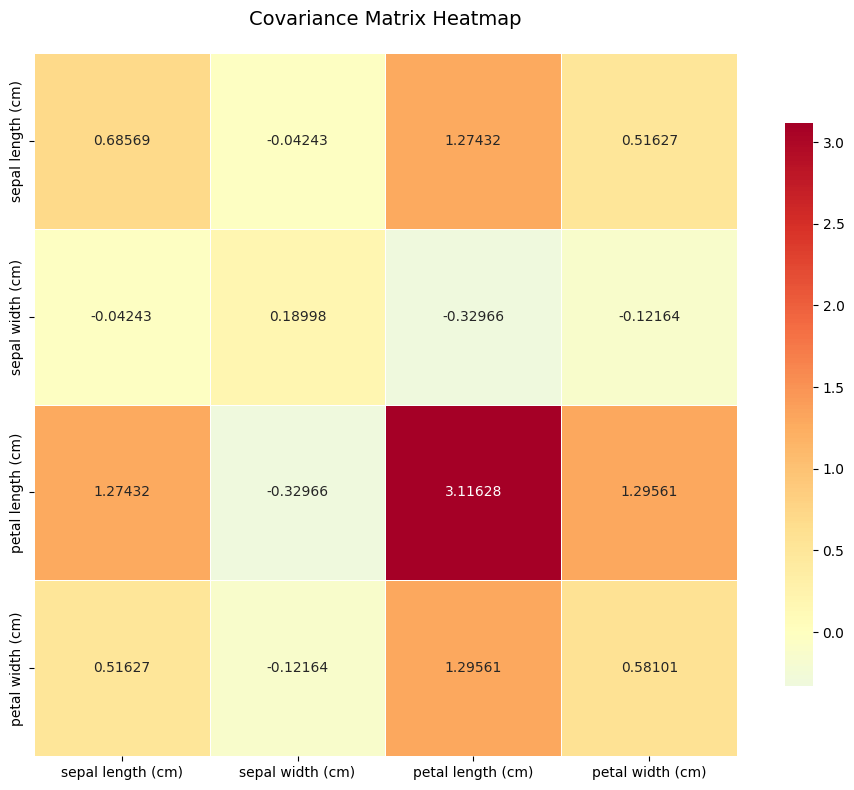

In [52]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, 
            annot=True, 
            fmt='.5f', 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Covariance Matrix Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()